## Imports

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.exceptions import ConvergenceWarning

import warnings

# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Loading the Datasets

In [37]:
agricultural_water_as_a_share_of_total_water_withdrawals = pd.read_csv('source_datasets/agricultural-water-as-a-share-of-total-water-withdrawals.csv')
industrial_water_as_a_share_of_total_water_withdrawals = pd.read_csv('source_datasets/industrial-water-as-a-share-of-total-water-withdrawals.csv')
municipal_water_as_a_share_of_total_water_withdrawals = pd.read_csv('source_datasets/municipal-water-as-a-share-of-total-water-withdrawals.csv')
Annual_Surface_Temperature_Change = pd.read_csv('source_datasets/Annual_Surface_Temperature_Change.csv')
FAOSTAT_meat_production_by_country_by_year = pd.read_csv('source_datasets/FAOSTAT_meat_production_by_country_by_year.csv')
renewable_water_resources_per_capita = pd.read_csv('source_datasets/renewable-water-resources-per-capita.csv')
share_of_population_urban = pd.read_csv('source_datasets/share-of-population-urban.csv')
state_capacity_index = pd.read_csv('source_datasets/state-capacity-index.csv')
WDI_variables = pd.read_csv('source_datasets/WDI_variables.csv')
freshwater_withdrawals_as_a_share_of_internal_resources = pd.read_csv('source_datasets/freshwater-withdrawals-as-a-share-of-internal-resources.csv')

In [38]:
agricultural_water_as_a_share_of_total_water_withdrawals.head()

,Entity,Code,Year,"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)"
0,Afghanistan,AFG,1987,99.000046
1,Afghanistan,AFG,1988,98.972824
2,Afghanistan,AFG,1989,98.944450
3,Afghanistan,AFG,1990,98.914856
4,Afghanistan,AFG,1991,98.883950


In [39]:
industrial_water_as_a_share_of_total_water_withdrawals.head()

,Entity,Code,Year,"Annual freshwater withdrawals, industry (% of total freshwater withdrawal)"
0,Afghanistan,AFG,1987,0.000000
1,Afghanistan,AFG,1988,0.038641
2,Afghanistan,AFG,1989,0.078917
3,Afghanistan,AFG,1990,0.120934
4,Afghanistan,AFG,1991,0.164809


In [40]:
municipal_water_as_a_share_of_total_water_withdrawals.head()

,Entity,Code,Year,"Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)"
0,Afghanistan,AFG,1987,0.999958
1,Afghanistan,AFG,1988,0.988536
2,Afghanistan,AFG,1989,0.976631
3,Afghanistan,AFG,1990,0.964212
4,Afghanistan,AFG,1991,0.951243


In [41]:
Annual_Surface_Temperature_Change.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [42]:
FAOSTAT_meat_production_by_country_by_year.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5320,Producing Animals/Slaughtered,21151,"Edible offal of cattle, fresh, chilled or frozen",1961,1961,An,360000.0,E,Estimated value,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5320,Producing Animals/Slaughtered,21151,"Edible offal of cattle, fresh, chilled or frozen",1962,1962,An,384000.0,E,Estimated value,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5320,Producing Animals/Slaughtered,21151,"Edible offal of cattle, fresh, chilled or frozen",1963,1963,An,396000.0,E,Estimated value,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5320,Producing Animals/Slaughtered,21151,"Edible offal of cattle, fresh, chilled or frozen",1964,1964,An,402000.0,E,Estimated value,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5320,Producing Animals/Slaughtered,21151,"Edible offal of cattle, fresh, chilled or frozen",1965,1965,An,408000.0,E,Estimated value,NaN


In [43]:
renewable_water_resources_per_capita.head()

,Entity,Code,Year,Renewable internal freshwater resources per capita (cubic meters)
0,Afghanistan,AFG,1962,5256.9688
1,Afghanistan,AFG,1963,5148.8047
2,Afghanistan,AFG,1964,5039.8086
3,Afghanistan,AFG,1965,4929.3545
4,Afghanistan,AFG,1966,4819.5127


In [44]:
share_of_population_urban.head()

,Entity,Code,Year,Urban population (% of total population)
0,Afghanistan,AFG,1960,8.401
1,Afghanistan,AFG,1961,8.684
2,Afghanistan,AFG,1962,8.976
3,Afghanistan,AFG,1963,9.276
4,Afghanistan,AFG,1964,9.586


In [45]:
state_capacity_index.head()

,Entity,Code,Year,State capacity estimate
0,Afghanistan,AFG,1960,-1.383
1,Afghanistan,AFG,1961,-1.362
2,Afghanistan,AFG,1962,-1.369
3,Afghanistan,AFG,1963,-1.360
4,Afghanistan,AFG,1964,-1.379


In [46]:
WDI_variables.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,81,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, agriculture (% ...",ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,...,83.633270,82.964750,83.359745,83.226519,82.852077,83.350418,83.608959,NaN,NaN,NaN
1,82,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,...,12.008463,11.677217,10.818819,10.806661,9.976818,10.333224,10.277311,NaN,NaN,NaN
2,83,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, industry (% of ...",ER.H2O.FWIN.ZS,NaN,NaN,NaN,NaN,NaN,...,4.369645,5.368647,5.819470,5.966820,5.850732,6.306158,6.113730,NaN,NaN,NaN
3,85,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, total (billion ...",ER.H2O.FWTL.K3,NaN,NaN,NaN,NaN,NaN,...,92.689935,95.156360,96.659279,96.930950,97.640204,98.037076,98.377503,NaN,NaN,NaN
4,141,Africa Eastern and Southern,AFE,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,924.111737,931.506715,934.015106,879.750864,...,1653.295813,1639.943870,1510.042711,1771.175828,1737.643458,1727.181531,1864.028459,1923.422312,1841.858488,NaN


In [47]:
freshwater_withdrawals_as_a_share_of_internal_resources.head()

,Entity,Code,Year,6.4.2 - Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) - ER_H2O_STRESS - No breakdown
0,Afghanistan,AFG,2000,54.76
1,Afghanistan,AFG,2001,54.76
2,Afghanistan,AFG,2002,54.76
3,Afghanistan,AFG,2003,54.76
4,Afghanistan,AFG,2004,54.76


## Merging the Datasets

In [48]:
temp1 = pd.merge(left = agricultural_water_as_a_share_of_total_water_withdrawals,
                 left_on = ['Code', 'Entity', 'Year'],
                 right = industrial_water_as_a_share_of_total_water_withdrawals,
                 right_on = ['Code', 'Entity', 'Year'],
                 how = 'inner')

In [49]:
temp2 = pd.merge(left = temp1,
                 left_on = ['Code', 'Entity', 'Year'],
                 right = municipal_water_as_a_share_of_total_water_withdrawals,
                 right_on = ['Code', 'Entity', 'Year'],
                 how = 'inner')

In [50]:
temp3 = pd.merge(left = temp2,
                 left_on = ['Code', 'Entity', 'Year'],
                 right = renewable_water_resources_per_capita,
                 right_on = ['Code', 'Entity', 'Year'],
                 how = 'inner')

In [51]:
temp4 = pd.merge(left = temp3,
                 left_on = ['Code', 'Entity', 'Year'],
                 right = share_of_population_urban,
                 right_on = ['Code', 'Entity', 'Year'],
                 how = 'inner')

In [52]:
temp5 = pd.merge(left = temp4,
                 left_on = ['Code', 'Entity', 'Year'],
                 right = state_capacity_index,
                 right_on = ['Code', 'Entity', 'Year'],
                 how = 'inner')

In [53]:
temp6 = pd.merge(left = temp5,
                 left_on = ['Code', 'Entity', 'Year'],
                 right = freshwater_withdrawals_as_a_share_of_internal_resources,
                 right_on = ['Code', 'Entity', 'Year'],
                 how = 'inner')

In [54]:
temp6[~temp6['Entity'].isin(FAOSTAT_meat_production_by_country_by_year['Area'])].head(n = 458)

,Entity,Code,Year,"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)",Renewable internal freshwater resources per capita (cubic meters),Urban population (% of total population),State capacity estimate,6.4.2 - Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) - ER_H2O_STRESS - No breakdown
207,Bolivia,BOL,2000,91.090390,2.249342,6.660269,35320.8600,61.787000,0.226100,1.11
208,Bolivia,BOL,2001,91.199340,2.163495,6.637161,34701.2460,62.306000,0.207000,1.12
209,Bolivia,BOL,2002,91.306656,2.078942,6.614402,34098.8900,62.783000,0.193500,1.13
210,Bolivia,BOL,2003,91.412360,1.995656,6.591984,33508.5940,63.248000,0.168000,1.13
211,Bolivia,BOL,2004,91.516495,1.913606,6.569899,32930.8600,63.711000,0.221400,1.14
...,...,...,...,...,...,...,...,...,...,...
2360,Vietnam,VNM,2012,94.782394,3.747410,1.470194,4024.8003,31.752000,0.583100,18.13
2361,Vietnam,VNM,2013,94.782394,3.747410,1.470194,3981.7104,32.429000,0.692200,18.13
2362,Vietnam,VNM,2014,94.782394,3.747410,1.470194,3939.4750,33.115000,0.648000,18.13
2363,Vietnam,VNM,2015,94.782394,3.747410,1.470194,3898.6284,33.809000,0.755700,18.13


In [55]:
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Bolivia (Plurinational State of)', 'Bolivia')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Cabo Verde', 'Cape Verde')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace("Côte d'Ivoire", "Cote d'Ivoire")
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Democratic Republic of the Congo', 'Democratic Republic of Congo')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Timor-Leste', 'East Timor')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Iran (Islamic Republic of)', 'Iran')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace("Lao People's Democratic Republic", 'Laos')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Republic of Moldova', 'Moldova')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Netherlands (Kingdom of the)', 'Netherlands')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace("Democratic People's Republic of Korea", 'North Korea')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Russian Federation', 'Russia')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Republic of Korea', 'South Korea')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Syrian Arab Republic', 'Syria')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('United Republic of Tanzania', 'Tanzania')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Türkiye', 'Turkey')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('United States of America', 'United States')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
FAOSTAT_meat_production_by_country_by_year['Area'] = FAOSTAT_meat_production_by_country_by_year['Area'].replace('Viet Nam', 'Vietnam')

In [56]:
temp7 = pd.merge(left = temp6,
                 left_on = ['Entity', 'Year'],
                 right = FAOSTAT_meat_production_by_country_by_year,
                 right_on = ['Area', 'Year'],
                 how = 'inner')[['Entity',
                                 'Code',
                                 'Year',
                                 '6.4.2 - Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) - ER_H2O_STRESS - No breakdown',
                                 'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
                                 'Annual freshwater withdrawals, industry (% of total freshwater withdrawal)',
                                 'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
                                 'Renewable internal freshwater resources per capita (cubic meters)',
                                 'Urban population (% of total population)',
                                 'State capacity estimate',
                                 'Value'
                                 ]]
temp7.rename(columns={'6.4.2 - Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) - ER_H2O_STRESS - No breakdown':'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%)', 'Value': 'Cattle Production'}, inplace=True)

In [57]:
temp7

,Entity,Code,Year,Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)",Renewable internal freshwater resources per capita (cubic meters),Urban population (% of total population),State capacity estimate,Cattle Production
0,Afghanistan,AFG,2000,54.76,98.606200,0.633545,0.760254,2412.6309,22.078,-1.18400,700000.00
1,Afghanistan,AFG,2001,54.76,98.518580,0.673374,0.808049,2394.7830,22.169,-1.28100,600000.00
2,Afghanistan,AFG,2002,54.76,98.431110,0.713133,0.855760,2245.2107,22.261,-1.33200,833000.00
3,Afghanistan,AFG,2003,54.76,98.343796,0.752822,0.903386,2082.1255,22.353,-1.80300,761000.00
4,Afghanistan,AFG,2004,54.76,98.256630,0.792440,0.950928,2001.8213,22.500,-1.82600,829000.00
...,...,...,...,...,...,...,...,...,...,...,...
2391,Zimbabwe,ZWE,2011,32.70,80.580560,4.255136,15.164305,941.2101,33.015,0.03609,3060942.49
2392,Zimbabwe,ZWE,2012,32.49,80.195750,3.799411,16.004839,924.2136,32.834,0.08874,3069409.87
2393,Zimbabwe,ZWE,2013,32.28,79.806060,3.337913,16.856024,904.4351,32.654,0.05633,3072585.53
2394,Zimbabwe,ZWE,2014,32.08,79.411410,2.870530,17.718060,884.8310,32.504,0.26540,2500000.00


In [58]:
range = temp7["Cattle Production"].max() - temp7["Cattle Production"].min()
min = temp7["Cattle Production"].min()

range

42325000.0

42,325,000

42,325,000x = 500,000

In [59]:
1000000/42325000

0.02362669816893089

In [60]:
np.exp(0.02362669816893089*0.219886)

1.0052086985019342

for an increase in 1 million cows, water stress increases by a factor of 0.52%

In [61]:
range = temp7["Cattle Production"].max() - temp7["Cattle Production"].min()
min = temp7["Cattle Production"].min()

range

42325000.0

In [62]:
df = pd.read_csv('source_datasets/WDI_variables.csv')
df.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,81,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, agriculture (% ...",ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,...,83.633270,82.964750,83.359745,83.226519,82.852077,83.350418,83.608959,NaN,NaN,NaN
1,82,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,...,12.008463,11.677217,10.818819,10.806661,9.976818,10.333224,10.277311,NaN,NaN,NaN
2,83,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, industry (% of ...",ER.H2O.FWIN.ZS,NaN,NaN,NaN,NaN,NaN,...,4.369645,5.368647,5.819470,5.966820,5.850732,6.306158,6.113730,NaN,NaN,NaN
3,85,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, total (billion ...",ER.H2O.FWTL.K3,NaN,NaN,NaN,NaN,NaN,...,92.689935,95.156360,96.659279,96.930950,97.640204,98.037076,98.377503,NaN,NaN,NaN
4,141,Africa Eastern and Southern,AFE,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,924.111737,931.506715,934.015106,879.750864,...,1653.295813,1639.943870,1510.042711,1771.175828,1737.643458,1727.181531,1864.028459,1923.422312,1841.858488,NaN


In [63]:
df['Indicator Name'].value_counts()

Indicator Name
Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)    266
Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)       266
Annual freshwater withdrawals, industry (% of total freshwater withdrawal)       266
Annual freshwater withdrawals, total (billion cubic meters)                      266
Cereal yield (kg per hectare)                                                    266
Control of Corruption: Estimate                                                  266
Electricity production from hydroelectric sources (% of total)                   266
Permanent cropland (% of land area)                                              266
Population density (people per sq. km of land area)                              266
Name: count, dtype: int64

In [64]:
melted_df = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name'], var_name='Year', value_name='Value')

# Convert 'Value' column to numeric, ignoring errors for non-numeric values
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')

# Pivot the melted DataFrame to get the desired structure
pivoted_df = melted_df.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Indicator Name', values='Value').reset_index()
pivoted_df.replace('Unnamed: 0', np.nan, inplace=True)
pivoted_df = pivoted_df.fillna(value = 0)
pivoted_df['Year'] = pivoted_df['Year'].astype('int64')
pivoted_df = pivoted_df[pivoted_df['Year'] != 0]
pivoted_df = pivoted_df[['Country Name',
                         'Year',
                         'Annual freshwater withdrawals, total (billion cubic meters)',
                         'Cereal yield (kg per hectare)',
                         'Control of Corruption: Estimate',
                         'Electricity production from hydroelectric sources (% of total)',
                         'Permanent cropland (% of land area)',
                         'Population density (people per sq. km of land area)'
                         ]]

In [65]:
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Cabo Verde', 'Cape Verde')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Congo, Rep.', 'Congo')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Congo, Dem. Rep.', 'Democratic Republic of Congo')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Timor-Leste', 'East Timor')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Egypt, Arab Rep.', 'Egypt')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Gambia, The', 'Gambia')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Iran, Islamic Rep.', 'Iran')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Kyrgyz Republic', 'Kyrgyzstan')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Lao PDR', 'Laos')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace("Korea, Dem. People's Rep.", 'North Korea')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Korea, Rep.', 'South Korea')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Russian Federation', 'Russia')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Slovak Republic', 'Slovakia')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Syrian Arab Republic', 'Syria')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Turkiye', 'Turkey')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Venezuela, RB', 'Venezuela')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Viet Nam', 'Vietnam')
pivoted_df['Country Name'] = pivoted_df['Country Name'].replace('Yemen, Rep.', 'Yemen')

In [66]:
df_final = pd.merge(left = temp7,
                    left_on = ['Entity', 'Year'],
                    right = pivoted_df,
                    right_on = ['Country Name', 'Year'],
                    how = 'inner')[['Entity',
                                    'Code',
                                    'Year',
                                    'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%)',
                                    'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
                                    'Annual freshwater withdrawals, industry (% of total freshwater withdrawal)',
                                    'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
                                    'Renewable internal freshwater resources per capita (cubic meters)',
                                    'Urban population (% of total population)',
                                    'State capacity estimate',
                                    'Cattle Production',
                                    'Annual freshwater withdrawals, total (billion cubic meters)',
                                    'Cereal yield (kg per hectare)', 'Control of Corruption: Estimate',
                                    'Electricity production from hydroelectric sources (% of total)',
                                    'Permanent cropland (% of land area)',
                                    'Population density (people per sq. km of land area)'
                                    ]]

In [67]:
df_final

,Entity,Code,Year,Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)",Renewable internal freshwater resources per capita (cubic meters),Urban population (% of total population),State capacity estimate,Cattle Production,"Annual freshwater withdrawals, total (billion cubic meters)",Cereal yield (kg per hectare),Control of Corruption: Estimate,Electricity production from hydroelectric sources (% of total),Permanent cropland (% of land area),Population density (people per sq. km of land area)
0,Afghanistan,AFG,2000,54.76,98.606200,0.633545,0.760254,2412.6309,22.078,-1.18400,700000.00,20.282000,806.3,-1.271724,0.000000,0.170185,29.963329
1,Afghanistan,AFG,2001,54.76,98.518580,0.673374,0.808049,2394.7830,22.169,-1.28100,600000.00,20.282000,1006.7,0.000000,0.000000,0.171719,30.186640
2,Afghanistan,AFG,2002,54.76,98.431110,0.713133,0.855760,2245.2107,22.261,-1.33200,833000.00,20.282000,1669.8,-1.251137,0.000000,0.171719,32.197624
3,Afghanistan,AFG,2003,54.76,98.343796,0.752822,0.903386,2082.1255,22.353,-1.80300,761000.00,20.282000,1458.0,-1.344180,0.000000,0.171719,34.719547
4,Afghanistan,AFG,2004,54.76,98.256630,0.792440,0.950928,2001.8213,22.500,-1.82600,829000.00,20.282000,1334.8,-1.350647,0.000000,0.171719,36.112339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,Zimbabwe,ZWE,2011,32.70,80.580560,4.255136,15.164305,941.2101,33.015,0.03609,3060942.49,3.482850,587.4,-1.425627,56.434462,0.258498,33.671410
2392,Zimbabwe,ZWE,2012,32.49,80.195750,3.799411,16.004839,924.2136,32.834,0.08874,3069409.87,3.460625,695.7,-1.381803,58.567858,0.258498,34.290632
2393,Zimbabwe,ZWE,2013,32.28,79.806060,3.337913,16.856024,904.4351,32.654,0.05633,3072585.53,3.438750,668.5,-1.419667,52.204807,0.258498,35.040512
2394,Zimbabwe,ZWE,2014,32.08,79.411410,2.870530,17.718060,884.8310,32.504,0.26540,2500000.00,3.416875,831.4,-1.404367,54.169160,0.258498,35.816862


In [68]:
range = df_final["Electricity production from hydroelectric sources (% of total)"].max() - df_final["Electricity production from hydroelectric sources (% of total)"].min()

range

np.exp(0.01*-2.146425)

0.9787644676734133

For a 1% increase in hydroelectric power, water stress decreases by a factor of 0.978, or 2.2%

In [69]:
df_final.replace(0, np.nan, inplace=True)

In [70]:
df_final.dropna().shape[0]

1568

<Axes: >

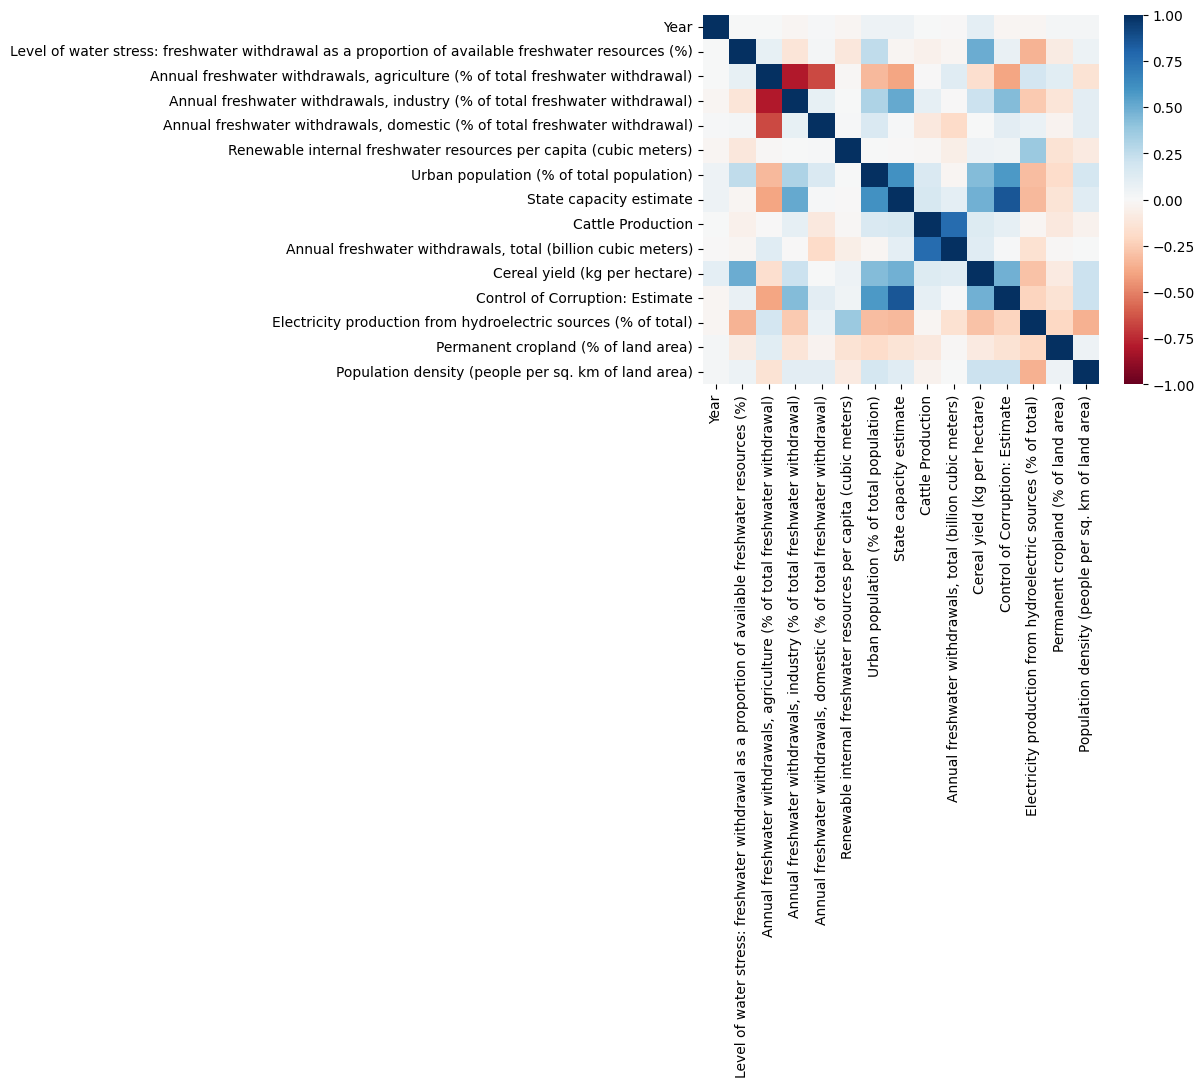

In [71]:
sns.heatmap(df_final[['Year',
                      'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%)',
                      'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
                      'Annual freshwater withdrawals, industry (% of total freshwater withdrawal)',
                      'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
                      'Renewable internal freshwater resources per capita (cubic meters)',
                      'Urban population (% of total population)',
                      'State capacity estimate',
                      'Cattle Production',
                      'Annual freshwater withdrawals, total (billion cubic meters)',
                      'Cereal yield (kg per hectare)', 'Control of Corruption: Estimate',
                      'Electricity production from hydroelectric sources (% of total)',
                      'Permanent cropland (% of land area)',
                      'Population density (people per sq. km of land area)'
                      ]].corr(), vmin = -1, vmax = 1, cmap = 'RdBu')

In [72]:
abs(df_final[['Year',
          'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%)',
          'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
          'Annual freshwater withdrawals, industry (% of total freshwater withdrawal)',
          'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
          'Renewable internal freshwater resources per capita (cubic meters)',
          'Urban population (% of total population)',
          'State capacity estimate',
          'Cattle Production',
          'Annual freshwater withdrawals, total (billion cubic meters)',
          'Cereal yield (kg per hectare)', 'Control of Corruption: Estimate',
          'Electricity production from hydroelectric sources (% of total)',
          'Permanent cropland (% of land area)',
          'Population density (people per sq. km of land area)'
          ]].corr()) >= 0.6

,Year,Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)",Renewable internal freshwater resources per capita (cubic meters),Urban population (% of total population),State capacity estimate,Cattle Production,"Annual freshwater withdrawals, total (billion cubic meters)",Cereal yield (kg per hectare),Control of Corruption: Estimate,Electricity production from hydroelectric sources (% of total),Permanent cropland (% of land area),Population density (people per sq. km of land area)
Year,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%),False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
"Annual freshwater withdrawals, industry (% of total freshwater withdrawal)",False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
"Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
Renewable internal freshwater resources per capita (cubic meters),False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Urban population (% of total population),False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
State capacity estimate,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
Cattle Production,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
"Annual freshwater withdrawals, total (billion cubic meters)",False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


In [73]:
df_final.rename(columns = {'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%)':'stress',
                           'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)':'agriculture_water',
                           'Annual freshwater withdrawals, industry (% of total freshwater withdrawal)':'industry_water',
                           'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)':'domestic_water',
                           'Renewable internal freshwater resources per capita (cubic meters)':'water_per_capita',
                           'Urban population (% of total population)':'urban_population',
                           'Annual freshwater withdrawals, total (billion cubic meters)':'total_withdrawals',
                           'Cereal yield (kg per hectare)':'cereal_yield',
                           'Control of Corruption: Estimate':'control_of_corruption',
                           'Electricity production from hydroelectric sources (% of total)':'hydro_electricity',
                           'Permanent cropland (% of land area)':'permanent_cropland',
                           'Population density (people per sq. km of land area)':'population_density',
                           'State capacity estimate':'state_capacity',
                           'Cattle Production':'cattle',
                           'Entity':'country',
                           'Code':'code',
                           'Year':'year'
                           }, inplace = True)

In [80]:
df_final

,country,code,year,stress,agriculture_water,industry_water,domestic_water,water_per_capita,urban_population,state_capacity,cattle,total_withdrawals,cereal_yield,control_of_corruption,hydro_electricity,permanent_cropland,population_density
0,Afghanistan,AFG,2000,54.76,98.606200,0.633545,0.760254,2412.6309,22.078,-1.18400,700000.00,20.282000,806.3,-1.271724,NaN,0.170185,29.963329
1,Afghanistan,AFG,2001,54.76,98.518580,0.673374,0.808049,2394.7830,22.169,-1.28100,600000.00,20.282000,1006.7,NaN,NaN,0.171719,30.186640
2,Afghanistan,AFG,2002,54.76,98.431110,0.713133,0.855760,2245.2107,22.261,-1.33200,833000.00,20.282000,1669.8,-1.251137,NaN,0.171719,32.197624
3,Afghanistan,AFG,2003,54.76,98.343796,0.752822,0.903386,2082.1255,22.353,-1.80300,761000.00,20.282000,1458.0,-1.344180,NaN,0.171719,34.719547
4,Afghanistan,AFG,2004,54.76,98.256630,0.792440,0.950928,2001.8213,22.500,-1.82600,829000.00,20.282000,1334.8,-1.350647,NaN,0.171719,36.112339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,Zimbabwe,ZWE,2011,32.70,80.580560,4.255136,15.164305,941.2101,33.015,0.03609,3060942.49,3.482850,587.4,-1.425627,56.434462,0.258498,33.671410
2392,Zimbabwe,ZWE,2012,32.49,80.195750,3.799411,16.004839,924.2136,32.834,0.08874,3069409.87,3.460625,695.7,-1.381803,58.567858,0.258498,34.290632
2393,Zimbabwe,ZWE,2013,32.28,79.806060,3.337913,16.856024,904.4351,32.654,0.05633,3072585.53,3.438750,668.5,-1.419667,52.204807,0.258498,35.040512
2394,Zimbabwe,ZWE,2014,32.08,79.411410,2.870530,17.718060,884.8310,32.504,0.26540,2500000.00,3.416875,831.4,-1.404367,54.169160,0.258498,35.816862


In [81]:
df_final.columns

Index(['country', 'code', 'year', 'stress', 'agriculture_water',
       'industry_water', 'domestic_water', 'water_per_capita',
       'urban_population', 'state_capacity', 'cattle', 'total_withdrawals',
       'cereal_yield', 'control_of_corruption', 'hydro_electricity',
       'permanent_cropland', 'population_density'],
      dtype='object')

In [82]:
df_final['year'].value_counts()

year
2012    159
2013    159
2014    159
2015    159
2010    154
2011    154
2008    153
2009    153
2007    150
2006    148
2005    145
2004    144
2003    143
2002    142
2001    139
2000    135
Name: count, dtype: int64

## Data Cleaning

### KNN Imputations

In [83]:
imputer = KNNImputer(n_neighbors = 5)

In [84]:
df_final.isna().sum()

country                    0
code                       0
year                       0
stress                     0
agriculture_water          0
industry_water            17
domestic_water             0
water_per_capita          16
urban_population           0
state_capacity             0
cattle                    16
total_withdrawals          0
cereal_yield              48
control_of_corruption    139
hydro_electricity        717
permanent_cropland         0
population_density         0
dtype: int64

In [85]:
imputed_values = imputer.fit_transform(df_final[['cattle', 'total_withdrawals']])
df_final[['cattle', 'total_withdrawals']] = imputed_values

In [86]:
df_final.isna().sum()

country                    0
code                       0
year                       0
stress                     0
agriculture_water          0
industry_water            17
domestic_water             0
water_per_capita          16
urban_population           0
state_capacity             0
cattle                     0
total_withdrawals          0
cereal_yield              48
control_of_corruption    139
hydro_electricity        717
permanent_cropland         0
population_density         0
dtype: int64

In [87]:
imputed_values = imputer.fit_transform(df_final[['state_capacity', 'control_of_corruption']])
df_final[['state_capacity', 'control_of_corruption']] = imputed_values

In [88]:
df_final.isna().sum()

country                    0
code                       0
year                       0
stress                     0
agriculture_water          0
industry_water            17
domestic_water             0
water_per_capita          16
urban_population           0
state_capacity             0
cattle                     0
total_withdrawals          0
cereal_yield              48
control_of_corruption      0
hydro_electricity        717
permanent_cropland         0
population_density         0
dtype: int64

In [89]:
imputed_values = imputer.fit_transform(df_final[['agriculture_water', 'industry_water']])
df_final[['agriculture_water', 'industry_water']] = imputed_values

### Column Mean Imputations

In [90]:
df_final.fillna(df_final[['stress',
                          'agriculture_water',
                          'industry_water',
                          'domestic_water',
                          'water_per_capita',
                          'urban_population',
                          'state_capacity',
                          'cattle',
                          'total_withdrawals',
                          'cereal_yield',
                          'control_of_corruption',
                          'hydro_electricity',
                          'permanent_cropland',
                          'population_density'
                          ]].mean(), inplace = True)

In [91]:
df_final.isna().sum()

country                  0
code                     0
year                     0
stress                   0
agriculture_water        0
industry_water           0
domestic_water           0
water_per_capita         0
urban_population         0
state_capacity           0
cattle                   0
total_withdrawals        0
cereal_yield             0
control_of_corruption    0
hydro_electricity        0
permanent_cropland       0
population_density       0
dtype: int64

## Data Preparation

In [93]:
features_matrix = df_final[['agriculture_water',
                            'industry_water',
                            'domestic_water',
                            'water_per_capita',
                            'urban_population', 
                            'state_capacity', 
                            'cattle', 
                            'total_withdrawals',
                            'cereal_yield', 
                            'control_of_corruption', 
                            'hydro_electricity',
                            'permanent_cropland', 
                            'population_density'
                            ]]

### Normalization

In [94]:
x = features_matrix.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_final[['agriculture_water',
          'industry_water',
          'domestic_water',
          'water_per_capita',
          'urban_population',
          'state_capacity',
          'cattle',
          'total_withdrawals',
          'cereal_yield', 
          'control_of_corruption', 
          'hydro_electricity', 
          'permanent_cropland', 
          'population_density'
          ]] = x_scaled

In [95]:
df_final

,country,code,year,stress,agriculture_water,industry_water,domestic_water,water_per_capita,urban_population,state_capacity,cattle,total_withdrawals,cereal_yield,control_of_corruption,hydro_electricity,permanent_cropland,population_density
0,Afghanistan,AFG,2000,54.76,0.989050,0.006161,0.004577,0.007439,0.150751,0.213500,0.016537,0.030923,0.021020,0.133944,0.320168,0.005931,0.003636
1,Afghanistan,AFG,2001,54.76,0.988170,0.006562,0.005056,0.007384,0.151743,0.195108,0.014174,0.030923,0.026476,0.143635,0.320168,0.005985,0.003665
2,Afghanistan,AFG,2002,54.76,0.987291,0.006961,0.005535,0.006922,0.152745,0.185438,0.019679,0.030923,0.044531,0.138723,0.320168,0.005985,0.003922
3,Afghanistan,AFG,2003,54.76,0.986414,0.007360,0.006013,0.006419,0.153748,0.096132,0.017978,0.030923,0.038764,0.117124,0.320168,0.005985,0.004245
4,Afghanistan,AFG,2004,54.76,0.985538,0.007758,0.006489,0.006171,0.155350,0.091771,0.019585,0.030923,0.035409,0.115623,0.320168,0.005985,0.004424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,Zimbabwe,ZWE,2011,32.70,0.807948,0.042543,0.149057,0.002896,0.269950,0.444841,0.072318,0.005297,0.015060,0.098218,0.564251,0.009032,0.004111
2392,Zimbabwe,ZWE,2012,32.49,0.804082,0.037965,0.157488,0.002844,0.267977,0.454824,0.072518,0.005264,0.018008,0.108391,0.585590,0.009032,0.004190
2393,Zimbabwe,ZWE,2013,32.28,0.800167,0.033329,0.166025,0.002783,0.266016,0.448678,0.072593,0.005230,0.017268,0.099601,0.521946,0.009032,0.004286
2394,Zimbabwe,ZWE,2014,32.08,0.796202,0.028634,0.174672,0.002722,0.264381,0.488320,0.059065,0.005197,0.021703,0.103153,0.541594,0.009032,0.004386


### EDA: Boxplot of every explanatory variable

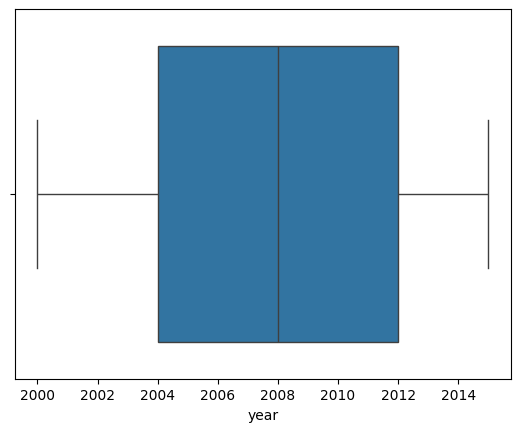

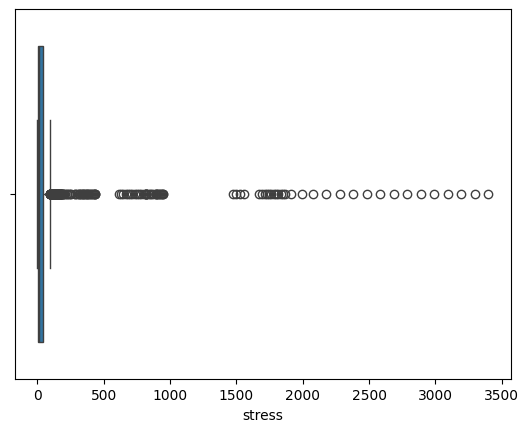

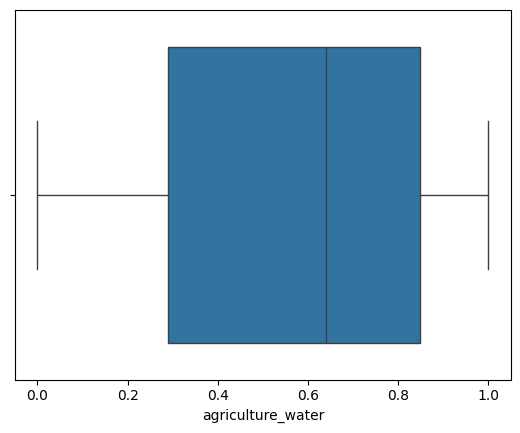

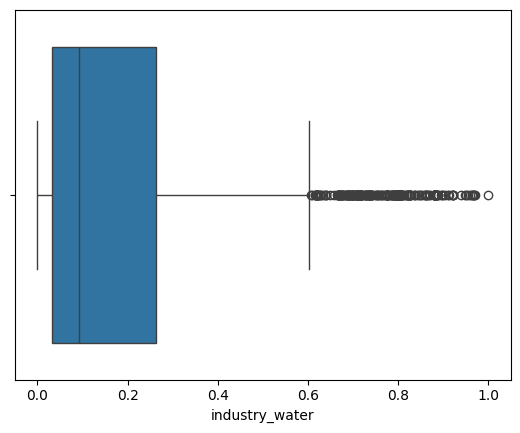

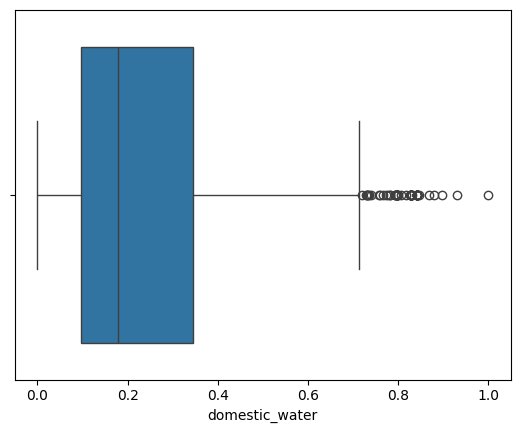

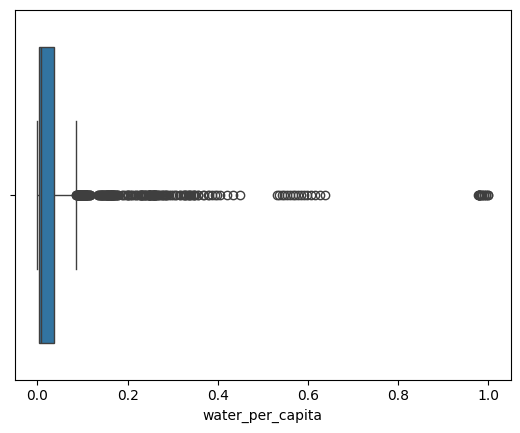

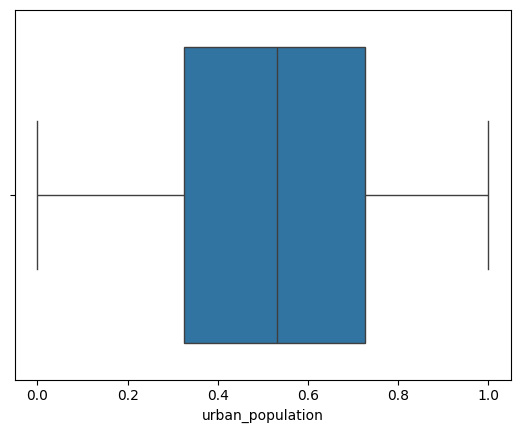

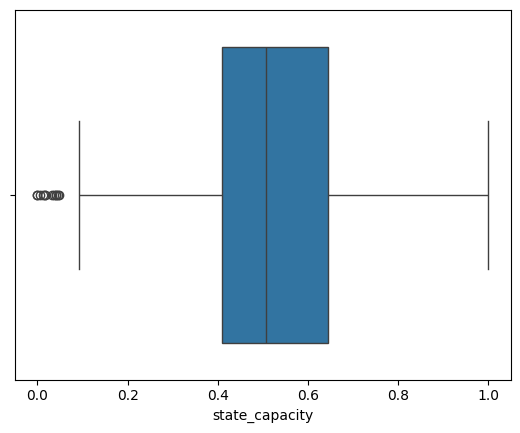

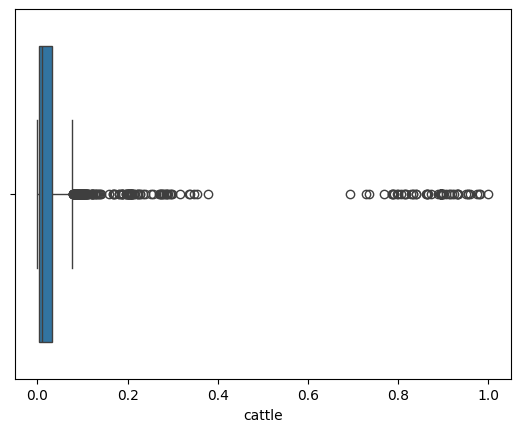

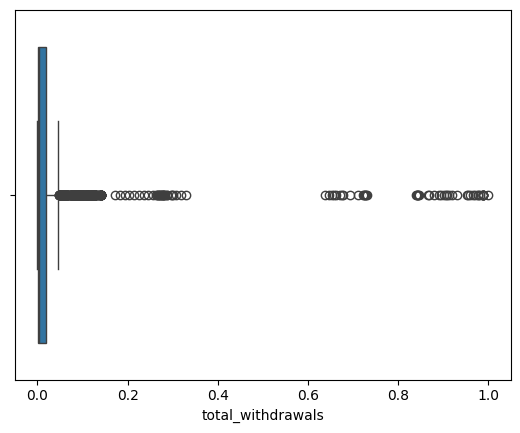

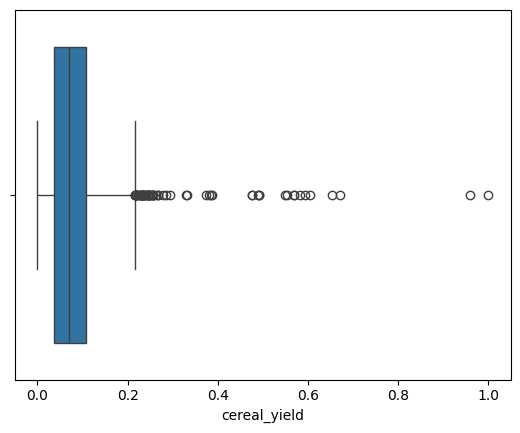

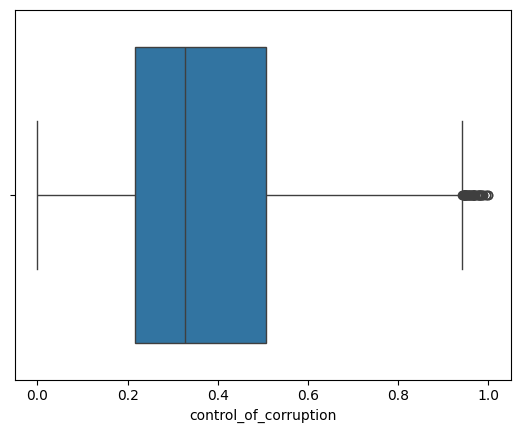

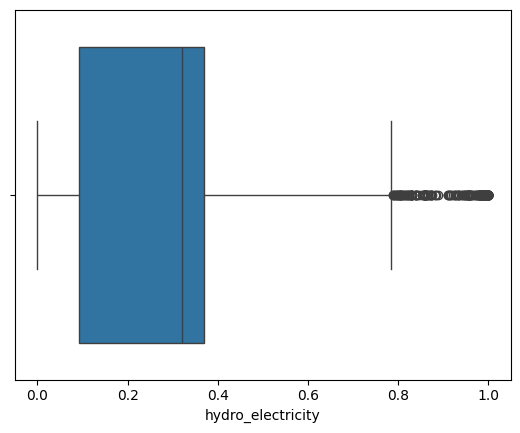

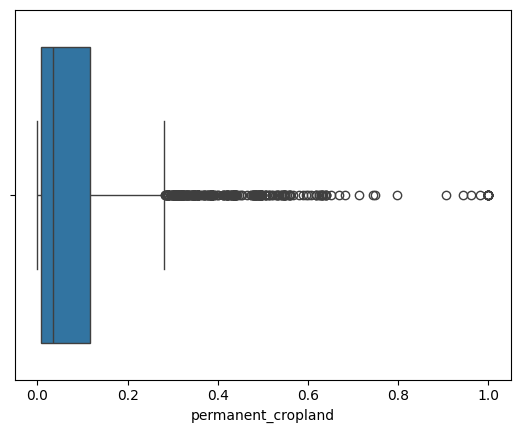

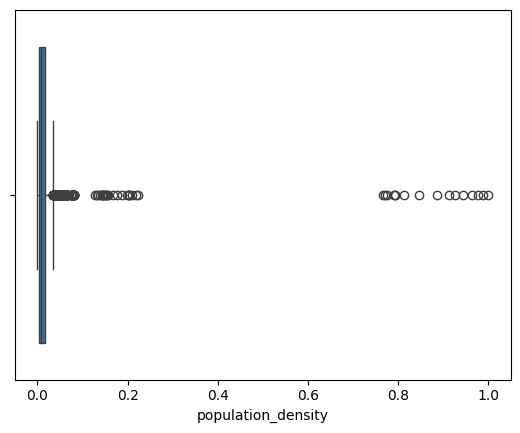

In [96]:
for col in df_final[['year',
                     'stress',
                     'agriculture_water',
                     'industry_water',
                     'domestic_water',
                     'water_per_capita',
                     'urban_population',
                     'state_capacity',
                     'cattle',
                     'total_withdrawals',
                     'cereal_yield',
                     'control_of_corruption',
                     'hydro_electricity',
                     'permanent_cropland',
                     'population_density'
                     ]]:
    sns.boxplot(data = df_final, x = col)
    plt.show()

## EDA: Scatterplot of every explanatory variable with the response variable

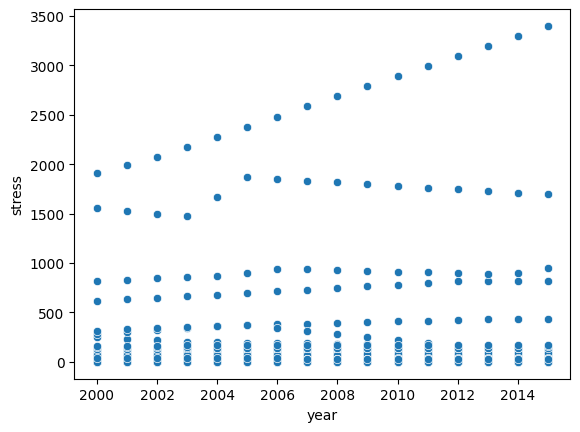

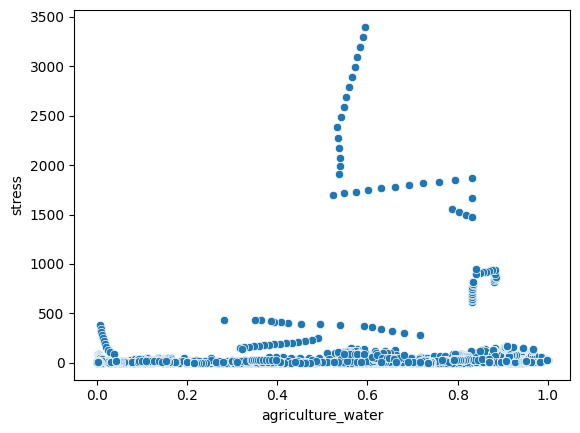

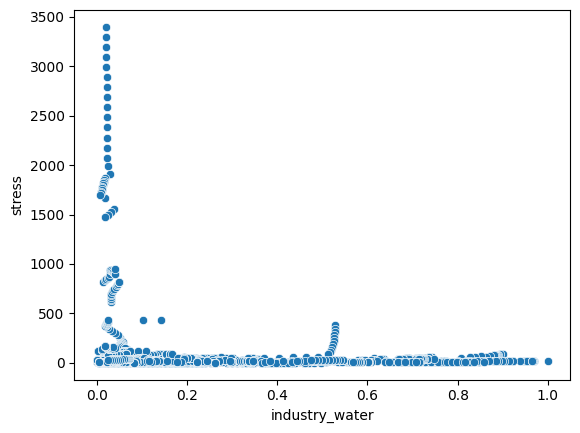

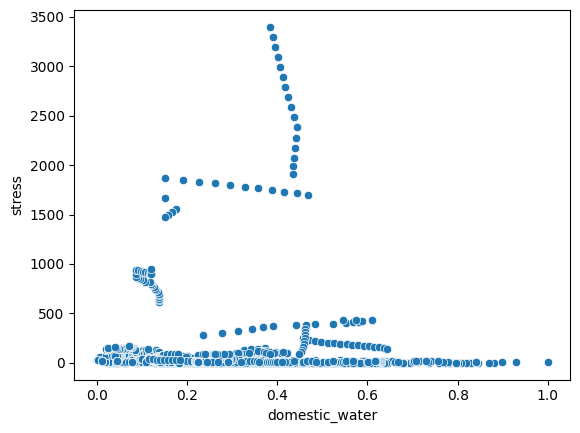

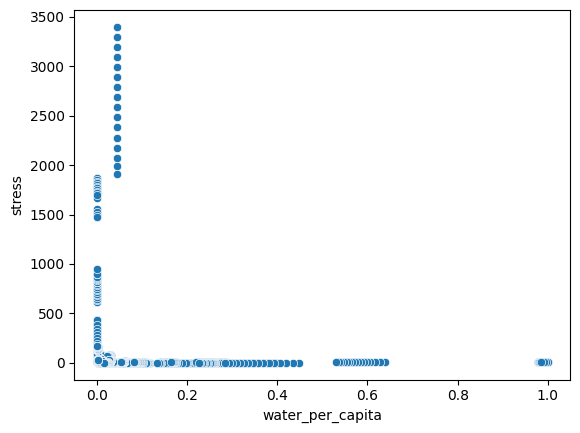

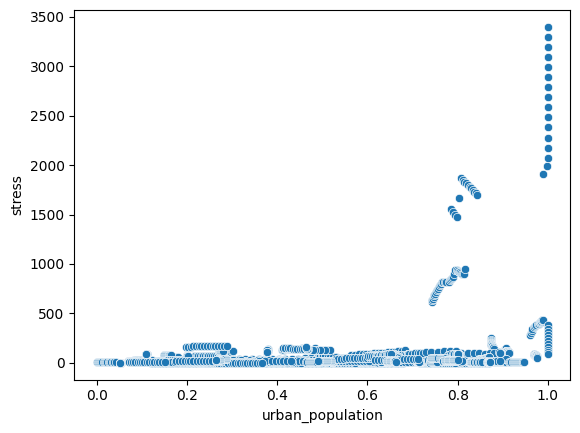

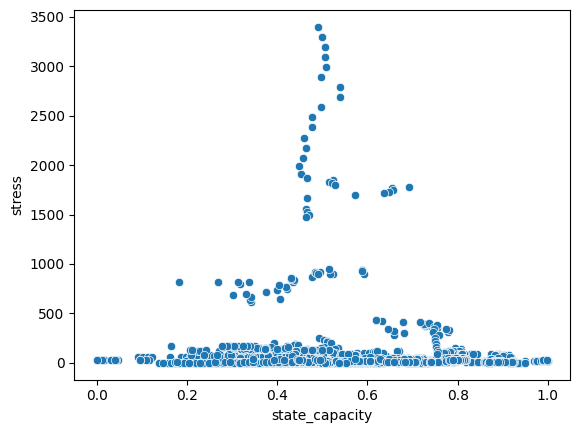

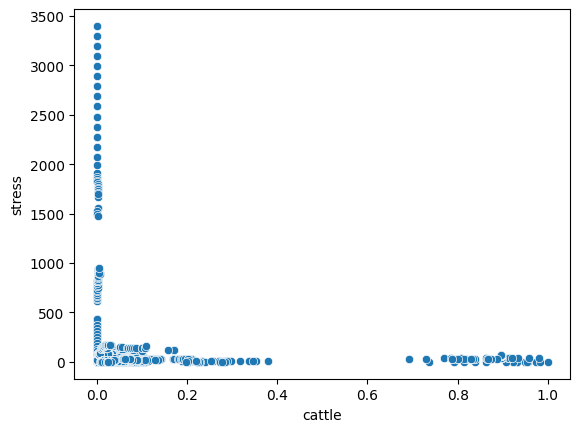

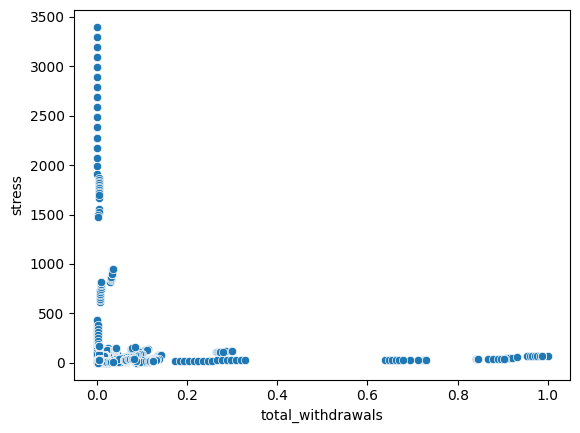

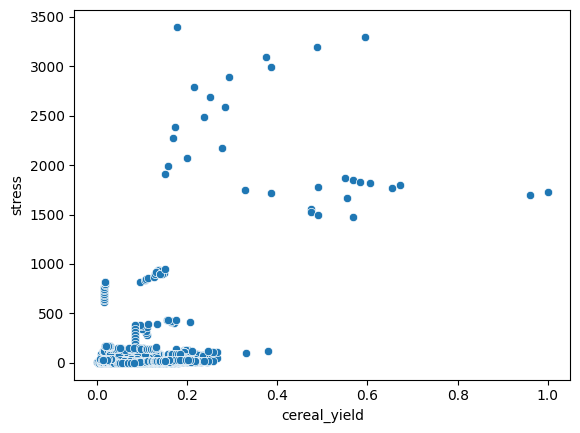

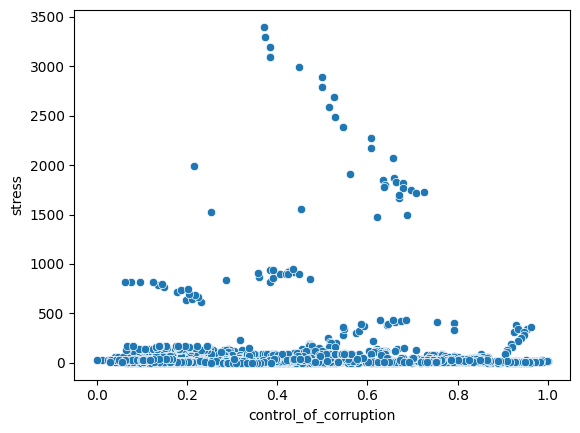

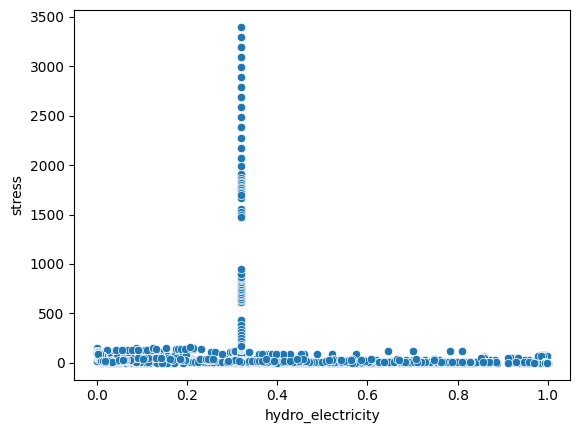

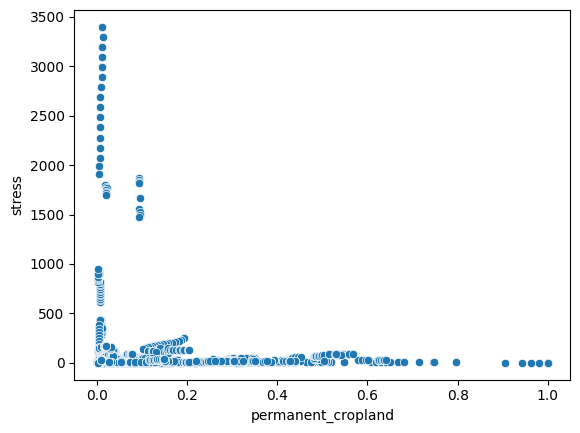

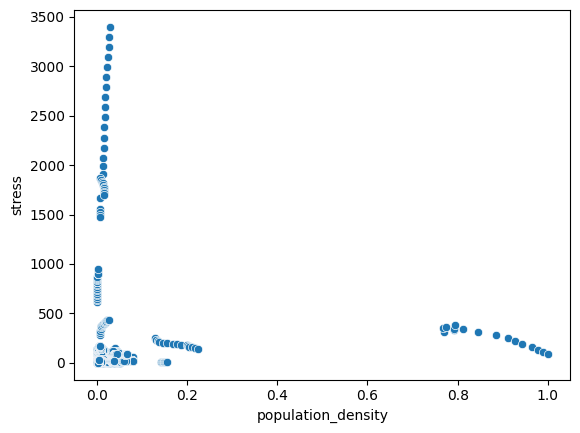

In [97]:
for col in df_final[['year',
                     'agriculture_water',
                     'industry_water',
                     'domestic_water',
                     'water_per_capita',
                     'urban_population',
                     'state_capacity',
                     'cattle',
                     'total_withdrawals',
                     'cereal_yield',
                     'control_of_corruption',
                     'hydro_electricity',
                     'permanent_cropland',
                     'population_density'
                     ]]:
    sns.scatterplot(data = df_final, x = col, y = 'stress')
    plt.show()

## Model Exploration

In [98]:
df_final['ln_stress'] = np.log(df_final['stress'])

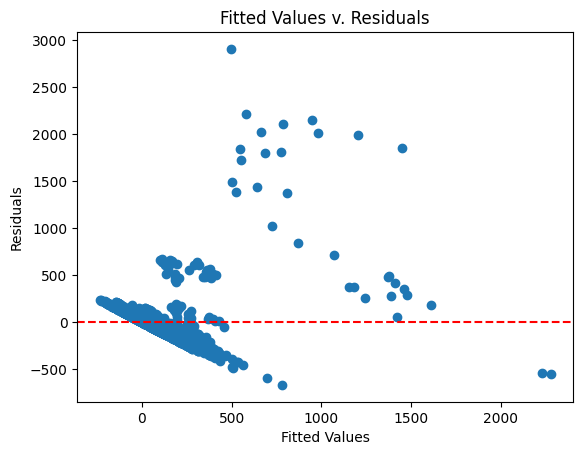

In [99]:
slr_model = smf.ols(formula = 'stress~year+agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df_final).fit()
plt.scatter(slr_model.fittedvalues, slr_model.resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values v. Residuals')
plt.show()

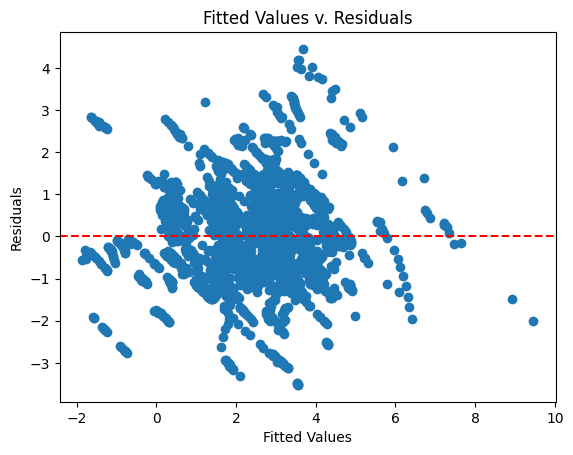

In [100]:
slr_model = smf.ols(formula = 'ln_stress~year+agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df_final).fit()
plt.scatter(slr_model.fittedvalues, slr_model.resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values v. Residuals')
plt.show()

In [101]:
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_stress   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     251.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:59:48   Log-Likelihood:                -3796.4
No. Observations:                2396   AIC:                             7623.
Df Residuals:                    2381   BIC:                             7710.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                48.5995     10.743      4.524      0.000      27.534      69.665
year                     -0.0243      0.005     -4.543      0.000      -0.035      -0.014
agriculture_water         3.4225      0.672      5.094      0.000       2.105       4.740
industry_water            1.4588      0.675      2.162      0.031       0.136       2.782
domestic_water           -0.7301      0.655     -1.115      0.265      -2.014       0.554
water_per_capita         -5.2225      0.232    -22.502      0.000      -5.678      -4.767
urban_population          1.6691      0.136     12.237      0.000       1.402       1.937
state_capacity           -0.0623      0.302     -0.206      0.837      -0.655       0.531
cattle                   -1.8998      0.315     -6.036      0.000      -2.517      -1.283
total_withdrawals         1.9507      0.374      5.211      0.000       1.217       2.685
cereal_yield              7.2922      0.405     17.986      0.000       6.497       8.087
control_of_corruption    -0.1495      0.221     -0.676      0.499      -0.583       0.284
hydro_electricity        -1.5943      0.104    -15.399      0.000      -1.797      -1.391
permanent_cropland       -1.1536      0.161     -7.153      0.000      -1.470      -0.837
population_density        4.6274      0.348     13.282      0.000       3.944       5.311
==============================================================================
Omnibus:                       53.264   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.168
Skew:                           0.264   Prob(JB):                     3.52e-16
Kurtosis:                       3.659   Cond. No.                     8.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""